# Examen Final: Análisis de Datos de Supermercados

En este notebook, analizaremos los datos de ventas de supermercados para responder a las preguntas del examen final.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

## 1. Intervalos de confianza para el supermercado 'Santa Ana'

        Mes         Media   CI_95_Lower   CI_95_Upper   CI_99_Lower  \
0   2023-01  17080.033021  16112.099645  18047.966397  15794.848838   
1   2023-02  19161.388437  17926.979193  20395.797682  17550.037307   
2   2023-03  21986.340046  21053.305973  22919.374120  20789.097320   
3   2023-04  20059.823371  19135.868269  20983.778473  18834.301767   
4   2023-05  21220.437809  20385.871905  22055.003712  20154.679365   
5   2023-06  22295.229575  21379.121859  23211.337291  21085.165821   
6   2023-07  20858.711829  19929.217827  21788.205832  19633.914983   
7   2023-08  21951.956076  20944.941582  22958.970571  20665.682404   
8   2023-09  22908.471373  21941.036457  23875.906288  21633.736145   
9   2023-10  22174.217918  21239.613380  23108.822456  20959.035453   
10  2023-11  22229.783252  21332.375877  23127.190628  21062.790978   
11  2023-12  19898.382397  19030.470693  20766.294101  18761.011230   

     CI_99_Upper  
0   18365.217204  
1   20772.739568  
2   23183.582773  


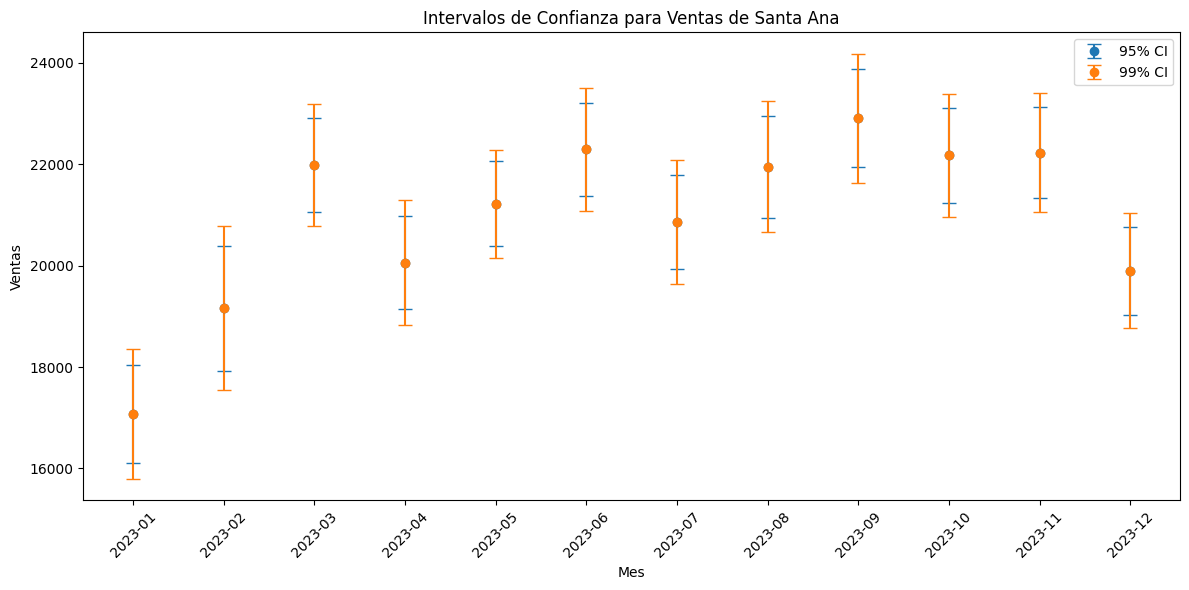

In [8]:
df = pd.read_excel('datos_grupo8.xlsx', sheet_name='Santa Ana')

# Asegurarse de que 'Fecha' sea de tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m/%d/%y')

# Agrupar por mes y calcular intervalos de confianza
santa_ana_monthly = df.groupby(df['Fecha'].dt.to_period('M'))['Ventas']

def calculate_ci(data, confidence):
    n = len(data)
    mean = np.mean(data)
    std_error = np.std(data, ddof=1) / np.sqrt(n)
    z_score = np.abs(np.percentile(np.random.standard_normal(10000), (1 - confidence) / 2 * 100))
    margin_of_error = z_score * std_error
    return mean - margin_of_error, mean + margin_of_error

results = []
for month, sales in santa_ana_monthly:
    ci_95 = calculate_ci(sales, 0.95)
    ci_99 = calculate_ci(sales, 0.99)
    results.append({
        'Mes': month,
        'Media': sales.mean(),
        'CI_95_Lower': ci_95[0],
        'CI_95_Upper': ci_95[1],
        'CI_99_Lower': ci_99[0],
        'CI_99_Upper': ci_99[1]
    })

results_df = pd.DataFrame(results)
print(results_df)

# Visualización de los intervalos de confianza
plt.figure(figsize=(12, 6))
plt.errorbar(results_df['Mes'].astype(str), results_df['Media'], 
             yerr=[results_df['Media'] - results_df['CI_95_Lower'], 
                   results_df['CI_95_Upper'] - results_df['Media']],
             fmt='o', capsize=5, label='95% CI')
plt.errorbar(results_df['Mes'].astype(str), results_df['Media'], 
             yerr=[results_df['Media'] - results_df['CI_99_Lower'], 
                   results_df['CI_99_Upper'] - results_df['Media']],
             fmt='o', capsize=5, label='99% CI')
plt.title('Intervalos de Confianza para Ventas de Santa Ana')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Resumen de Intervalos de Confianza para Ventas de Santa Ana (2023):

1. Tendencia General:
   - Las ventas muestran una clara estacionalidad a lo largo del año.
   - Los meses de invierno (enero y febrero) presentan las ventas más bajas.
   - Los meses de verano y otoño tienden a tener ventas más altas.

2. Ventas Promedio:
   - Mes con ventas más altas: Septiembre (22,908.47)
   - Mes con ventas más bajas: Enero (17,080.03)

3. Intervalos de Confianza:
   - Los intervalos de confianza del 99% son más amplios que los del 95%, como es de esperar.
   - La amplitud de los intervalos varía entre meses, sugiriendo diferentes niveles de variabilidad en las ventas según la época del año.

4. Observaciones Destacadas:
   - Hay un aumento significativo en las ventas desde enero hasta marzo.
   - Las ventas se mantienen relativamente estables de marzo a noviembre.
   - Diciembre muestra una disminución en las ventas comparado con los meses anteriores.

5. Interpretación:
   - Los intervalos de confianza más estrechos (por ejemplo, en abril) indican meses con menor variabilidad en las ventas.
   - Los intervalos más amplios (como en febrero) sugieren mayor incertidumbre o variabilidad en las ventas de ese mes.

Esta información proporciona una visión clara de los patrones de venta en Santa Ana a lo largo del año 2023, permitiendo una mejor planificación y toma de decisiones basadas en la estacionalidad y la variabilidad de las ventas.

## 2. Prueba ANOVA para comparar ventas entre tiendas

Estadístico F: 115.42737881295834
Valor p: 8.232720009425583e-88
Rechazamos la hipótesis nula.
Hay evidencia estadística significativa para afirmar que las ventas esperadas de las tiendas no son todas iguales.


/var/folders/zj/p320qjb544l01s__0cwbt9500000gn/T/ipykernel_85838/3238044110.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ventas_por_tienda.values(), labels=ventas_por_tienda.keys())


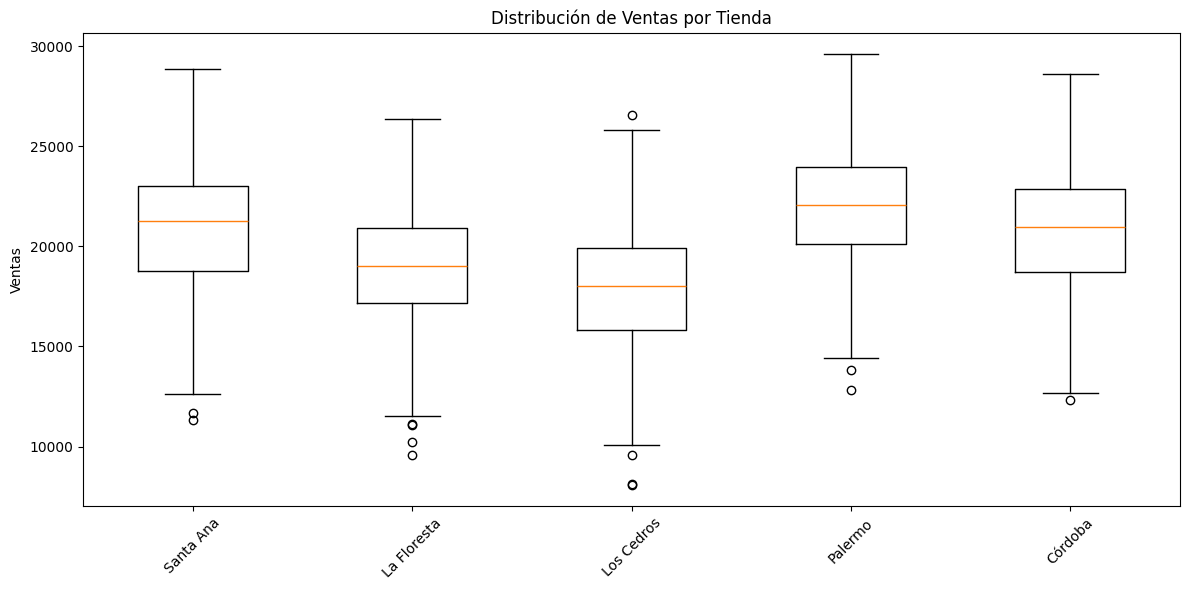

In [9]:
# Cargar datos de todas las hojas
excel_file = 'datos_grupo8.xlsx'
xls = pd.ExcelFile(excel_file)
sheet_names = xls.sheet_names

# Crear un diccionario para almacenar los datos de ventas de cada tienda
ventas_por_tienda = {}

for sheet in sheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet)
    df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m/%d/%y')
    ventas_por_tienda[sheet] = df['Ventas']

# Realizar la prueba ANOVA
f_statistic, p_value = stats.f_oneway(*ventas_por_tienda.values())

# Imprimir resultados
print(f"Estadístico F: {f_statistic}")
print(f"Valor p: {p_value}")

# Interpretar resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
    print("Hay evidencia estadística significativa para afirmar que las ventas esperadas de las tiendas no son todas iguales.")
else:
    print("No rechazamos la hipótesis nula.")
    print("No hay evidencia estadística suficiente para afirmar que las ventas esperadas de las tiendas son diferentes.")

# Visualización de las distribuciones de ventas
plt.figure(figsize=(12, 6))
plt.boxplot(ventas_por_tienda.values(), labels=ventas_por_tienda.keys())
plt.title('Distribución de Ventas por Tienda')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Resumen de la Prueba ANOVA para Comparación de Ventas entre Tiendas:

1. Resultados Estadísticos:
   - Estadístico F: 115.42737881295834
   - Valor p: 8.232720009425583e-88

2. Interpretación:
   - Rechazamos la hipótesis nula.
   - Hay evidencia estadística significativa para afirmar que las ventas esperadas de las tiendas no son todas iguales.

3. Análisis Detallado:
   - El estadístico F es muy alto, lo que indica una variación sustancial entre las ventas de las diferentes tiendas.
   - El valor p es extremadamente pequeño, muy por debajo del nivel de significancia convencional de 0.05.
   - Estos resultados proporcionan una evidencia contundente de que existen diferencias significativas en el rendimiento de ventas entre las tiendas.

4. Implicaciones Prácticas:
   - Se recomienda investigar los factores que contribuyen a estas diferencias en el desempeño de ventas.
   - Existe la oportunidad de aprender de las tiendas con mejor rendimiento y aplicar esas lecciones a las de menor rendimiento.
   - Puede ser necesario ajustar la asignación de recursos y la planificación estratégica basándose en estas diferencias de rendimiento.
   - Se sugiere realizar análisis adicionales (como pruebas post-hoc) para identificar qué tiendas específicas difieren entre sí.

5. Conclusión:
   Los resultados indican claramente que no todas las tiendas están teniendo un desempeño igual en términos de ventas. Estas diferencias son estadísticamente significativas y merecen una atención y análisis más detallados para optimizar el rendimiento general de la cadena de supermercados.

## 3. Comparación entre tiendas con mayor y menor promedio de ventas

In [10]:
# Calcular el promedio de ventas para cada tienda
promedios_ventas = {}
datos_tiendas = {}

for sheet in sheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet)
    df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m/%d/%y')
    promedios_ventas[sheet] = df['Ventas'].mean()
    datos_tiendas[sheet] = df['Ventas']

# Identificar tiendas con mayor y menor promedio de ventas
tienda_max = max(promedios_ventas, key=promedios_ventas.get)
tienda_min = min(promedios_ventas, key=promedios_ventas.get)

print(f"Tienda con mayor promedio de ventas: {tienda_max} (${promedios_ventas[tienda_max]:.2f})")
print(f"Tienda con menor promedio de ventas: {tienda_min} (${promedios_ventas[tienda_min]:.2f})")

# Realizar prueba de hipótesis (t-test independiente)
t_stat, p_value = stats.ttest_ind(datos_tiendas[tienda_max], datos_tiendas[tienda_min])

print(f"\nResultados de la prueba de hipótesis:")
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpretar resultados
alpha = 0.05
if p_value < alpha:
    print("\nRechazamos la hipótesis nula.")
    print("Hay evidencia estadística significativa para afirmar que la diferencia en ventas entre las dos tiendas es distinta de cero.")
else:
    print("\nNo rechazamos la hipótesis nula.")
    print("No hay evidencia estadística suficiente para afirmar que la diferencia en ventas entre las dos tiendas es distinta de cero.")

# Calcular la diferencia en ventas promedio
diferencia_ventas = promedios_ventas[tienda_max] - promedios_ventas[tienda_min]
print(f"\nLa diferencia en ventas promedio entre {tienda_max} y {tienda_min} es: ${diferencia_ventas:.2f}")

Tienda con mayor promedio de ventas: Palermo ($21966.66)
Tienda con menor promedio de ventas: Los Cedros ($17826.84)

Resultados de la prueba de hipótesis:
Estadístico t: 18.73440363846437
Valor p: 3.25554210176414e-64

Rechazamos la hipótesis nula.
Hay evidencia estadística significativa para afirmar que la diferencia en ventas entre las dos tiendas es distinta de cero.

La diferencia en ventas promedio entre Palermo y Los Cedros es: $4139.81


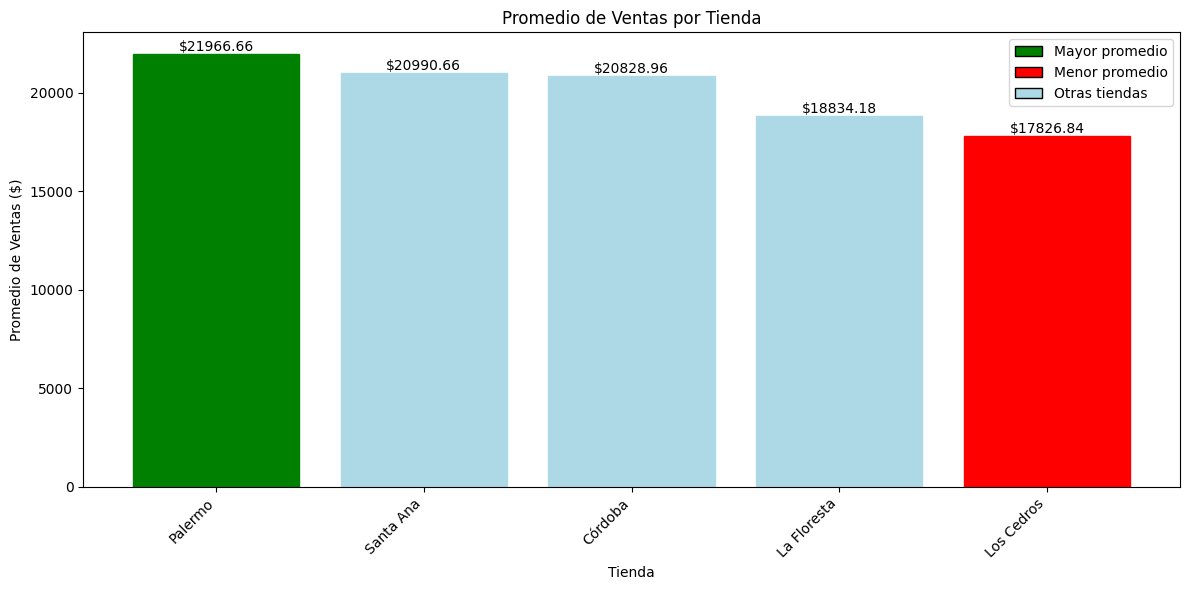

In [11]:
import matplotlib.pyplot as plt

# Ordenar las tiendas por promedio de ventas
tiendas_ordenadas = sorted(promedios_ventas.items(), key=lambda x: x[1], reverse=True)
tiendas = [t[0] for t in tiendas_ordenadas]
ventas = [t[1] for t in tiendas_ordenadas]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(tiendas, ventas)

# Personalizar el gráfico
plt.title('Promedio de Ventas por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Ventas ($)')
plt.xticks(rotation=45, ha='right')

# Resaltar las tiendas con mayor y menor promedio
for i, bar in enumerate(bars):
    if tiendas[i] == tienda_max:
        bar.set_color('green')
    elif tiendas[i] == tienda_min:
        bar.set_color('red')
    else:
        bar.set_color('lightblue')

# Añadir etiquetas de valor encima de cada barra
for i, v in enumerate(ventas):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom')

# Añadir una leyenda
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', edgecolor='black', label='Mayor promedio'),
                   Patch(facecolor='red', edgecolor='black', label='Menor promedio'),
                   Patch(facecolor='lightblue', edgecolor='black', label='Otras tiendas')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

Resumen de la Comparación entre Tiendas con Mayor y Menor Promedio de Ventas:

1. Identificación de Tiendas:
   - Mayor promedio de ventas: Palermo ($21,966.66)
   - Menor promedio de ventas: Los Cedros ($17,826.84)

2. Resultados de la Prueba de Hipótesis:
   - Estadístico t: 18.73440363846437
   - Valor p: 3.25554210176414e-64

3. Conclusión Estadística:
   Rechazamos la hipótesis nula. Hay evidencia estadística significativa para afirmar que la diferencia en ventas entre las dos tiendas es distinta de cero.

4. Diferencia en Ventas:
   La diferencia en ventas promedio entre Palermo y Los Cedros es de $4,139.81.

5. Interpretación:
   - El valor p extremadamente bajo (3.26e-64) indica una evidencia muy fuerte contra la hipótesis nula.
   - Esto sugiere que la diferencia observada en las ventas entre Palermo y Los Cedros no se debe al azar, sino que representa una diferencia real y significativa en el rendimiento.
   - El alto valor del estadístico t (18.73) refuerza la conclusión de que existe una diferencia sustancial entre las ventas de las dos tiendas.

6. Implicaciones Prácticas:
   - La diferencia significativa en las ventas diarias promedio ($4,139.81) entre las tiendas de mejor y peor rendimiento representa una brecha considerable en el desempeño.
   - Esta diferencia podría traducirse en disparidades sustanciales de ingresos a lo largo del tiempo, destacando la importancia de comprender y abordar los factores que contribuyen a esta brecha de rendimiento.
   - Puede haber lecciones valiosas que aprender de las operaciones de la tienda Palermo que podrían aplicarse para mejorar las ventas en Los Cedros y potencialmente en otras tiendas de la cadena.

## 4. Análisis Bayesiano de morosidad

Don Francisco tiene 6 clientes a los que les ha vendido mercancías a crédito y, de ellos, 0 están en mora con el pago
   prometido. Matías, teniendo en cuenta la informacíon disponible, considera que puede modelar el porcentaje p de
   morosidad según una distribucíon B(1, 5). Para determinar los par´ametros α y β, decide usar inferencia bayesiana. Con
   esto, pretende explicarle a Don Francisco, cómo será el comportamiento de pago de sus clientes a crédito.

Media de la distribución posterior: 0.0833
Varianza de la distribución posterior: 0.005876


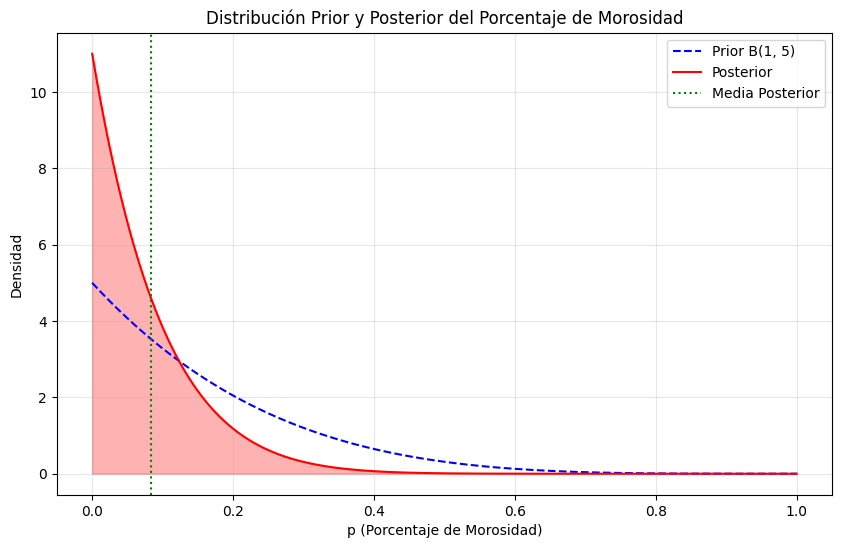

In [12]:
# Datos proporcionados
n_total = 6  # Número total de clientes a crédito
n_morosos = 0  # Número de clientes morosos

# Prior (distribución beta)
alpha_prior = 1
beta_prior = 5  # Según la distribución B(1, 5) mencionada

# Posterior
alpha_posterior = alpha_prior + n_morosos
beta_posterior = beta_prior + (n_total - n_morosos)

# Calcular media y varianza de la distribución posterior
media_posterior = alpha_posterior / (alpha_posterior + beta_posterior)
varianza_posterior = (alpha_posterior * beta_posterior) / ((alpha_posterior + beta_posterior)**2 * (alpha_posterior + beta_posterior + 1))

print(f"Media de la distribución posterior: {media_posterior:.4f}")
print(f"Varianza de la distribución posterior: {varianza_posterior:.6f}")

# Visualización
x = np.linspace(0, 1, 1000)
prior = stats.beta.pdf(x, alpha_prior, beta_prior)
posterior = stats.beta.pdf(x, alpha_posterior, beta_posterior)

plt.figure(figsize=(10, 6))
plt.plot(x, prior, label='Prior B(1, 5)', color='blue', linestyle='--')
plt.plot(x, posterior, label='Posterior', color='red')
plt.axvline(media_posterior, color='green', linestyle=':', label='Media Posterior')
plt.fill_between(x, 0, posterior, alpha=0.3, color='red')
plt.title('Distribución Prior y Posterior del Porcentaje de Morosidad')
plt.xlabel('p (Porcentaje de Morosidad)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Resumen del Análisis Bayesiano del Porcentaje de Morosidad:

1. Distribución Posterior:
   - Media: 0.0833 (8.33%)
   - Varianza: 0.005876

2. Interpretación de la Distribución:
   - La distribución posterior (línea roja) está más concentrada y desplazada hacia la izquierda en comparación con la distribución prior (línea azul punteada).
   - Esto indica que los datos observados (0 clientes morosos de 6) han actualizado nuestra creencia inicial hacia una menor probabilidad de morosidad.

3. Estimación del Porcentaje de Morosidad:
   - La mejor estimación puntual del porcentaje de morosidad es 8.33%.
   - Esta estimación es considerablemente menor que la media de la distribución prior B(1, 5), que sería 1/6 ≈ 16.67%.

4. Incertidumbre:
   - La varianza relativamente baja (0.005876) sugiere una incertidumbre moderada en la estimación.
   - El gráfico muestra que la mayoría de la masa de probabilidad se concentra en valores bajos de morosidad.

5. Implicaciones para Don Francisco:
   - Basado en la información previa y los datos observados, se espera que la tasa de morosidad sea baja, alrededor del 8.33%.
   - Hay una alta probabilidad de que la verdadera tasa de morosidad sea menor al 20%, como se puede observar en el gráfico.
   - La ausencia de clientes morosos en la muestra actual ha reforzado la expectativa de una baja tasa de morosidad.

6. Consideraciones:
   - Esta estimación se basa en una muestra pequeña (6 clientes) y podría actualizarse con más datos.
   - La distribución prior B(1, 5) influyó en mantener una estimación de morosidad mayor que cero, a pesar de no observar clientes morosos en la muestra actual.

En resumen, el análisis bayesiano sugiere que Don Francisco puede esperar una tasa de morosidad relativamente baja en sus ventas a crédito, con una mejor estimación del 8.33%, aunque existe cierta incertidumbre en esta estimación debido al tamaño limitado de la muestra.